In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import os

%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

# stochastic gradient descent
from tensorflow.keras.optimizers import SGD

import plaidml.keras
plaidml.keras.install_backend()
from keras import backend as K

In [23]:
file = ('/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/Data/UK_Foods.csv')
                
df = pd.read_csv(file, index_col='Unnamed: 0')
df.head(20)

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df.transpose()


,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


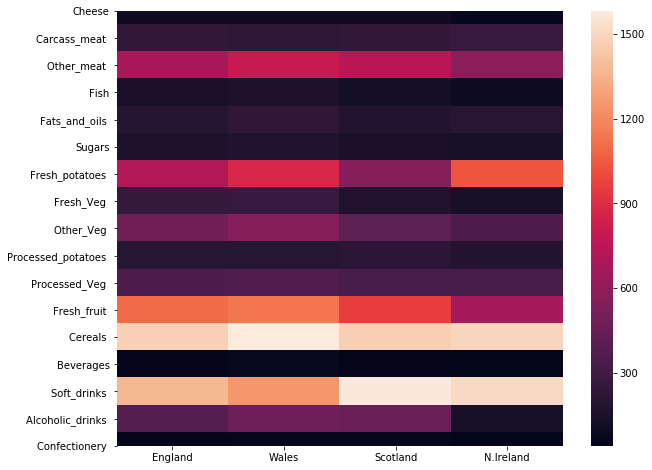

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

In [8]:
# going from 17 -->  8 --> 4 --> 2

encoder = Sequential()

encoder.add(Dense(units=8, activation='relu', input_shape=[17]))
encoder.add(Dense(units=4, activation='relu', input_shape=[8]))
encoder.add(Dense(units=2, activation='relu', input_shape=[4]))


In [9]:
decoder = Sequential()

decoder.add(Dense(units=4, activation='relu', input_shape=[2]))
decoder.add(Dense(units=8, activation='relu', input_shape=[4]))
decoder.add(Dense(units=17, activation='relu', input_shape=[8]))


In [10]:
autoencoder = Sequential([encoder, decoder])

In [11]:
autoencoder.compile(loss = 'mse',
                   optimizer = SGD(lr=1.0),
                   metrics=['accuracy'])

## TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
# add the transpose step
# add values to make sure it's a numpy array

scaled_df = scaler.fit_transform(df.transpose().values)

In [15]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [16]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 1s 227ms/sample - loss: 0.4231 - accuracy: 0.2500
Epoch 2/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.4078 - accuracy: 0.0000e+00
Epoch 3/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.3665 - accuracy: 0.0000e+00
Epoch 4/15
4/4 [==============================] - 0s 854us/sample - loss: 0.3401 - accuracy: 0.0000e+00
Epoch 5/15
4/4 [==============================] - 0s 912us/sample - loss: 0.3239 - accuracy: 0.0000e+00
Epoch 6/15
4/4 [==============================] - 0s 806us/sample - loss: 0.3138 - accuracy: 0.0000e+00
Epoch 7/15
4/4 [==============================] - 0s 835us/sample - loss: 0.3075 - accuracy: 0.0000e+00
Epoch 8/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.3033 - accuracy: 0.0000e+00
Epoch 9/15
4/4 [==============================] - 0s 902us/sample - loss: 0.3004 - accuracy: 0.2500
Epoch 10/15
4/4 [==============================] - 0s 866us

### Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.

In [17]:
# run through the 2dim

encoded_2dim = encoder.predict(scaled_df)

In [18]:
encoded_2dim

array([[0.01939415, 0.21160407],
       [0.        , 0.19375698],
       [0.2510013 , 0.3914048 ],
       [0.6074865 , 0.79676014]], dtype=float32)

### Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas

In [19]:
# check the index should be the countries

df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [20]:
# make the results a df

results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2'])

In [21]:
results = results.reset_index()
results

,index,C1,C2
0,England,0.019394,0.211604
1,Wales,0.000000,0.193757
2,Scotland,0.251001,0.391405
3,N.Ireland,0.607486,0.796760


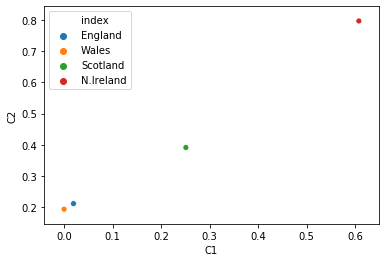

In [22]:
# plot coloring by index

sns.scatterplot(x='C1',y='C2',data=results,hue='index')

Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain.